In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Carregar os dados do CSV
dados = pd.read_csv('/content/Desempenho_alunos.csv')
#visualizando
print('>>>>> Visualizando os Dados <<<<<\n')
print(dados.shape)

dados.head()

>>>>> Visualizando os Dados <<<<<

(145, 33)


,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [ ]:
# Converter variáveis categóricas usando pd.get_dummies
X_encoded = pd.get_dummies(dados)
dados = X_encoded

In [ ]:
#Separando a coluna e tirando as colunas que não são necessárias
y = dados['GRADE'] #target
X = dados.drop(columns = ['22','24','25','27','28','29','COURSE ID'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 25)


In [ ]:
from sklearn.svm import SVC

In [ ]:
# Inicialize o classificador SVM com kernel linear
modelo_svm = SVC(kernel='linear')

In [ ]:
# Treine o modelo
modelo_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
previsoes = modelo_svm.predict(X_test)

In [ ]:
# Avaliando a precisão do modelo
acuracia = accuracy_score(y_test, previsoes)
print(f'Acurácia: {acuracia}')

Acurácia: 0.9310344827586207


In [ ]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
previsoes

array([2, 3, 1, 2, 7, 3, 7, 1, 2, 5, 2, 2, 5, 3, 1, 3, 5, 3, 1, 1, 1, 1,
       7, 1, 1, 1, 1, 5, 2])

#Vendo as melhores colunas

In [ ]:
# Inicialize o classificador RandomForest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Crie um DataFrame com as importâncias das features
parametros = pd.DataFrame({'feature': X_train.columns, 'Importancia': random_forest.feature_importances_})

In [ ]:
# Ordene o DataFrame pela importância das features em ordem decrescente
parametros = parametros.sort_values(by='Importancia', ascending=False)


In [ ]:
# Selecione as cinco principais features
top5_parametros = parametros.head(5)


In [ ]:
# Exibir as cinco principais features e suas importâncias
print(top5_parametros)


   feature  Importancia
24   GRADE     0.190771
16      17     0.044973
15      16     0.040093
12      13     0.037872
10      11     0.036359


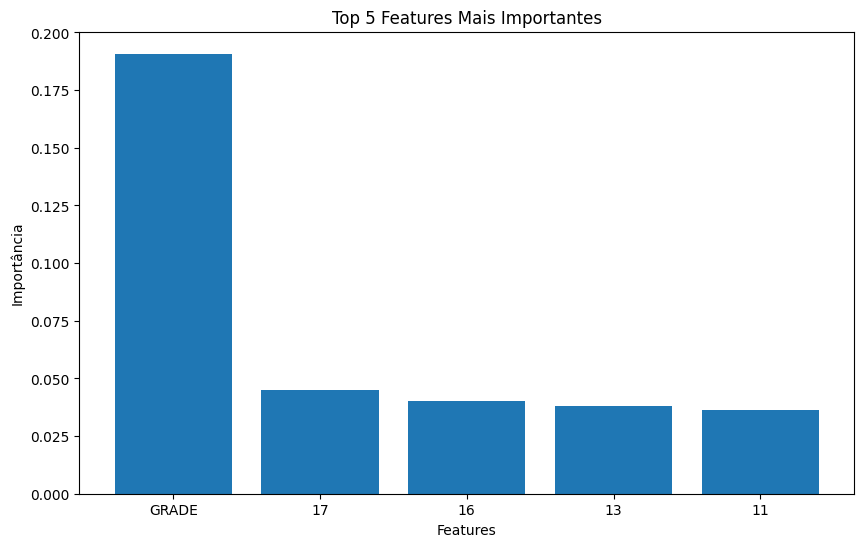

In [ ]:
# Cria um gráfico de barras para visualizar as cinco principais features
plt.figure(figsize=(10, 6))
plt.bar(top5_parametros['feature'], top5_parametros['Importancia'])
plt.xlabel('Features')
plt.ylabel('Importância')
plt.title('Top 5 Features Mais Importantes')
plt.show()